<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetic/blob/lesson3/GB_molecular_Biology_Genetics_Task_3_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 3. Мутации.

В таблицу гена, полученную по итогам практического задания первого урока, добавьте следующую информацию: количество rs для избранного гена.

Сделанное практическое задание предоставляется в формате .ipynb.

In [1]:
!pip install biopython -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Seq import MutableSeq
import time

Загрузим таблицу полученную во втором уроке.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/lesson2/df_task_2_corrected%20(1).csv')
df.T

,0
Unnamed: 0,0
geneId,790
geneSymbol,CAD
start,27217368
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12


## Нахождение количества патогенных мутаций.

In [4]:
Entrez.email = "dbsnp-user@nih.gov" # provide your user email 
# RECOMMENDED: apply for API key from NCBI (https://ncbiinsights.ncbi.nlm.nih.gov/2017/11/02/new-api-keys-for-the-e-utilities/). 
# 10 queries per second with a valid API key, otherwise 3 queries per seconds are allowed for 'None'
Entrez.api_key = None

# dbSNP supported query terms (https://www.ncbi.nlm.nih.gov/snp/docs/entrez_help/) can be build and test online using web query builder (https://www.ncbi.nlm.nih.gov/snp/advanced) 
# esearch handle
eShandle = Entrez.esearch(db="snp",  # search dbSNP
                          #complex query for missense and pathogenic variants in LPL gene with global MAF betweeen 0 and 0.01.
                          term='CAD[All Fields] AND pathogenic[Clinical_Significance] AND missense variant[Function_Class])',
                          #  AND (00000.0000[GLOBAL_MAF] : 00000.0100[GLOBAL_MAF])', 
                          usehistory="y", #cache result on server for download in batches
                          retmax=20 # return 20 RSID max
                         )

# get esearch result
eSresult = Entrez.read(eShandle)

In [5]:
# review results 
for k in eSresult:
    print (k, ":", eSresult[k])
    
#Output: Web environment (&WebEnv) and query key (&query_key) parameters specifying the location on the Entrez history server of the list of UIDs matching the Entrez query
#https://www.ncbi.nlm.nih.gov/books/NBK25500/#chapter1.Storing_Search_Results

Count : 4
RetMax : 4
RetStart : 0
QueryKey : 1
WebEnv : MCID_6483589e913c2e2a965ad91f
IdList : ['1475014505', '766975615', '763410987', '751610198']
TranslationSet : []
TranslationStack : [{'Term': 'CAD[All Fields]', 'Field': 'All Fields', 'Count': '12552', 'Explode': 'N'}, {'Term': 'pathogenic[Clinical_Significance]', 'Field': 'Clinical_Significance', 'Count': '130269', 'Explode': 'N'}, 'AND', {'Term': 'missense variant[Function_Class]', 'Field': 'Function_Class', 'Count': '10256260', 'Explode': 'N'}, 'AND']
QueryTranslation : CAD[All Fields] AND pathogenic[Clinical_Significance] AND missense variant[Function_Class]


У нас 4 интересующих нас мутации. Добавим их в таблицу. И посмотрим 

In [6]:
df['rs'] = eSresult['Count']
df.T

,0
Unnamed: 0,0
geneId,790
geneSymbol,CAD
start,27217368
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12


In [8]:
df.to_csv('df_task_3_corrected.csv', index=False)

In [9]:
# get result RSIDs list 'Idlist'
# total rs count 
rslist = (eSresult['IdList'])

In [10]:
# retmax = 20 so print only 20 RSIDs
# additional results can be retrieved by batches
# download in batches example http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc139 or see below.
for rs in rslist:
    print(rs)

1475014505
766975615
763410987
751610198


In [11]:
eSresult

{'Count': '4', 'RetMax': '4', 'RetStart': '0', 'QueryKey': '1', 'WebEnv': 'MCID_6483589e913c2e2a965ad91f', 'IdList': ['1475014505', '766975615', '763410987', '751610198'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'CAD[All Fields]', 'Field': 'All Fields', 'Count': '12552', 'Explode': 'N'}, {'Term': 'pathogenic[Clinical_Significance]', 'Field': 'Clinical_Significance', 'Count': '130269', 'Explode': 'N'}, 'AND', {'Term': 'missense variant[Function_Class]', 'Field': 'Function_Class', 'Count': '10256260', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'CAD[All Fields] AND pathogenic[Clinical_Significance] AND missense variant[Function_Class]'}

In [12]:
# get the WebEnv session cookie, and the QueryKey:

webenv = eSresult["WebEnv"]
query_key = eSresult["QueryKey"]
total_count = int(eSresult["Count"])
query_key = eSresult["QueryKey"]
retmax =  2 # return 4 rs per batch example

In [13]:
# sample codes adopted with modifications from http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc139.
fetch_count = 0
for start in range(0, total_count, retmax):
    end = min(total_count, start+retmax)
    print("Going to download record %i to %i" % (start+1, end))
    attempt = 0
    #fetch_count += 1
    while (attempt < 3):
        attempt += 1
        try:
            fetch_handle = Entrez.efetch(db="snp",
                                         #rettype="uilist", #available types [uilist | xml (use retmode=xml))
                                         retmode="xml",
                                        #  retmode="txt",
                                         retstart=start,
                                         retmax=retmax,
                                         webenv=webenv,
                                         query_key=query_key )
        except HTTPError as err:
            if 500 <= err.code <= 599:
                print("Received error from server %s" % err)
                print("Attempt %i of 3" % attempt)
                time.sleep(15)
            else:
                raise
    if (fetch_handle):
        #print(fetch_handle)            
        data = fetch_handle.read()
        print(data)
        fetch_handle.close()

Going to download record 1 to 2
b'<?xml version="1.0" ?>\n<ExchangeSet xmlns:xsi="https://www.w3.org/2001/XMLSchema-instance" xmlns="https://www.ncbi.nlm.nih.gov/SNP/docsum" xsi:schemaLocation="https://www.ncbi.nlm.nih.gov/SNP/docsum ftp://ftp.ncbi.nlm.nih.gov/snp/specs/docsum_eutils.xsd" ><DocumentSummary uid="1475014505"><SNP_ID>1475014505</SNP_ID><ALLELE_ORIGIN/><GLOBAL_MAFS><MAF><STUDY>GnomAD</STUDY><FREQ>A=0.000007/1</FREQ></MAF><MAF><STUDY>TOMMO</STUDY><FREQ>T=0.00006/1</FREQ></MAF><MAF><STUDY>TOPMED</STUDY><FREQ>A=0.000004/1</FREQ></MAF><MAF><STUDY>ALFA</STUDY><FREQ>A=0./0</FREQ></MAF></GLOBAL_MAFS><GLOBAL_POPULATION/><GLOBAL_SAMPLESIZE>0</GLOBAL_SAMPLESIZE><SUSPECTED/><CLINICAL_SIGNIFICANCE>pathogenic</CLINICAL_SIGNIFICANCE><GENES><GENE_E><NAME>CAD</NAME><GENE_ID>790</GENE_ID></GENE_E></GENES><ACC>NC_000002.12</ACC><CHR>2</CHR><HANDLE>TOMMO_GENOMICS,GNOMAD,TOPMED</HANDLE><SPDI>NC_000002.12:27233314:G:A,NC_000002.12:27233314:G:T</SPDI><FXN_CLASS>coding_sequence_variant,missense_

## Добавление мутаций в наш ген.

In [14]:
origin_gene_seq = Seq(df['gene'][0]).complement()
origin_gene_seq

Seq('TCAGAGACGACGACGGCGGTTCGCGCGGGCTCCGAGGATGCGACGGCGCGGGCC...ATT')

Найдём индекс для старт-кодона в нашей ДНК последовательности.

In [15]:
start_codon_index = str(origin_gene_seq).find('ATG')
start_codon_index

37

In [16]:
origin_gene_seq[start_codon_index:]

Seq('ATGCGACGGCGCGGGCCGAAGAGAGGTCGCGGGGCGCGGCAATCGGTGCACCTG...ATT')

In [17]:
protein_seq_ = origin_gene_seq[start_codon_index:]
protein_seq_

Seq('ATGCGACGGCGCGGGCCGAAGAGAGGTCGCGGGGCGCGGCAATCGGTGCACCTG...ATT')

In [18]:
mutable_seq = MutableSeq(protein_seq_)
mutable_seq

MutableSeq('ATGCGACGGCGCGGGCCGAAGAGAGGTCGCGGGGCGCGGCAATCGGTGCACCTG...ATT')

## Nonsense

Поменяем какой-нибудь кодон после стартового на стоп-кодон.

In [25]:
stop_codon = 'UAA'

In [22]:
seq_ = Seq('UAA')
seq_.transcribe().translate()

Seq('*')

Рассмотрим нормальный белок.

In [23]:
protein = protein_seq_.transcribe().translate()
protein

Seq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

In [26]:
mutable_seq[9:12] = stop_codon

nonsense_prot = mutable_seq.transcribe().translate()
nonsense_prot

MutableSeq('MRR*GPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

На четвёртом триплете в нашем протеине появился стоп-кодон.

##  Missense

In [ ]:
mutable_seq = MutableSeq(protein_seq_)
mutable_seq

MutableSeq('ATGCGACGGCGCGGGCCGAAGAGAGGTCGCGGGGCGCGGCAATCGGTGCACCTG...ATT')

In [ ]:
protein

Seq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

Заменим аминокислоту аргинин в 4-ой позиции протеина на глутамин.

In [ ]:
mutable_seq[9:12] = 'CAA'


missense_prot = mutable_seq.transcribe().translate()
missense_prot

MutableSeq('MRRQGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

Аминокислота была заменена.

## Synonimic

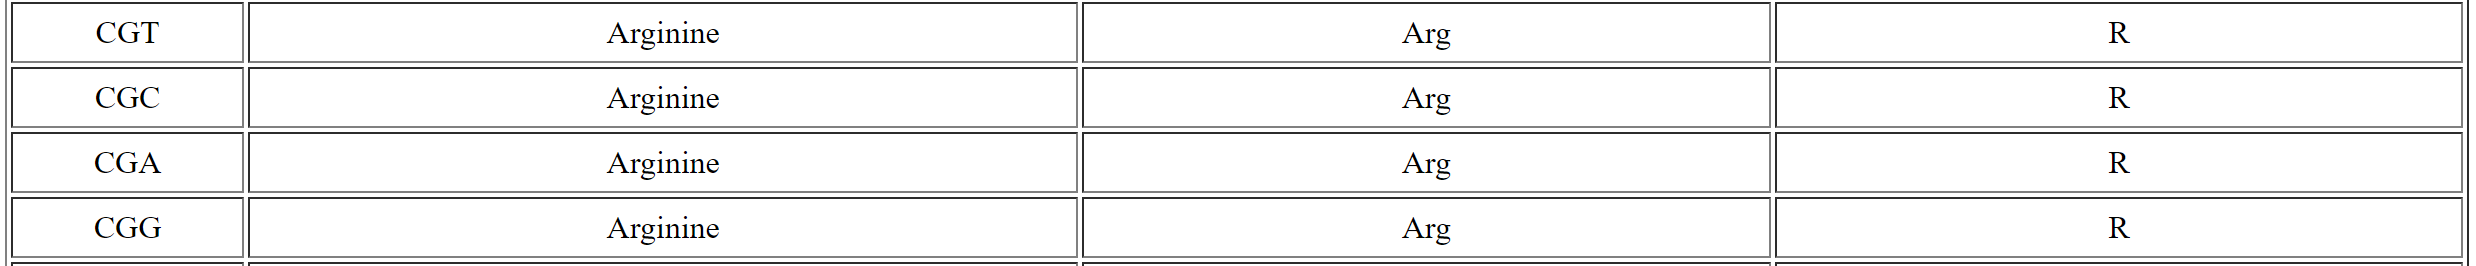

In [ ]:
mutable_seq = MutableSeq(protein_seq_)
mutable_seq

MutableSeq('ATGCGACGGCGCGGGCCGAAGAGAGGTCGCGGGGCGCGGCAATCGGTGCACCTG...ATT')

In [ ]:
mutable_seq[9:12]

MutableSeq('CGC')

In [ ]:
mutable_seq[9:12] = 'CGT'

syn_prot = mutable_seq.transcribe().translate()
syn_prot

MutableSeq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

Заменили последовательность на синонимичную.

## True silence

In [ ]:
origin_gene_seq

Seq('CAGAGACGACGACGGCGGTTCGCGCGGGCTCCGAGGATGCGACGGCGCGGGCCG...ATT')

In [ ]:
mutable_seq = MutableSeq(origin_gene_seq)
mutable_seq[0: 3] = 'CGC'

mutable_seq[start_codon_index:].transcribe().translate()

MutableSeq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

In [ ]:
protein

Seq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

Т.к. изменения произошли до старт кодона, то протеиновая последовательность аминокислот не изменилась.